In [1]:
from numpy import *
import operator


def createDataSet():
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ["A", "A", "B", "B"]
    return group, labels

# KNN

* Training set contains classifiers for each data point
* When we want to classify an item we determine the distance from each training item using the Euclidean distance
* We then sort the training set to find the closest k neighbors and find the most common label across them
* This label is the classification for our input

## Euclidean Distance

$ \sqrt { \sum{ _{i=1}^{n} (p - q)^2 } } $


In [2]:
from numpy import *
import operator


def getDistances(inPoint, dataSet):
    # Shape returns a tuple of array dimensions: https://numpy.org/doc/stable/reference/generated/numpy.shape.html
    dataSetLength = dataSet.shape[0]

    # Tile(arr, n) returns an array that repeats arr n times:
    # https://numpy.org/doc/stable/reference/generated/numpy.tile.html
    tiledInput = tile(inPoint, (dataSetLength, 1))

    # Take distances for each point
    diffMat = tiledInput - dataSet

    # Now take squares
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5

    return distances


def classify(inPoint, dataSet, labels, k):
    distances = getDistances(inPoint, dataSet)
    # Argsort returns the indices of the elements in sorted order
    sortedDistIndices = distances.argsort()

    classifierCount = {}
    for i in range(k):
        itemLabel = labels[sortedDistIndices[i]]
        classifierCount[itemLabel] = classifierCount.get(itemLabel, 0) + 1

    # Now find the highest ranked classification
    sortedClassificationCount = sorted(
        classifierCount.items(), key=operator.itemgetter(1), reverse=True
    )
    return sortedClassificationCount[0][0]

In [3]:
group, labels = createDataSet()

classify([0, 0], group, labels, 3)

'B'

In [4]:
def file2matrix(filename):
    # Open file and count number of lines
    fr = open(filename)
    numberOfLines = len(fr.readlines())

    # Create a matrix/2D array that's number of lines x 3
    returnMat = zeros((numberOfLines, 3))
    classLabelVector = []

    # Open the file again, get each line and push into the matrix and class labels
    fr = open(filename)
    index = 0
    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split("\t")
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1

    return returnMat, classLabelVector

In [5]:
datingDataMat,datingLabels = file2matrix("datingTestSet2.txt")


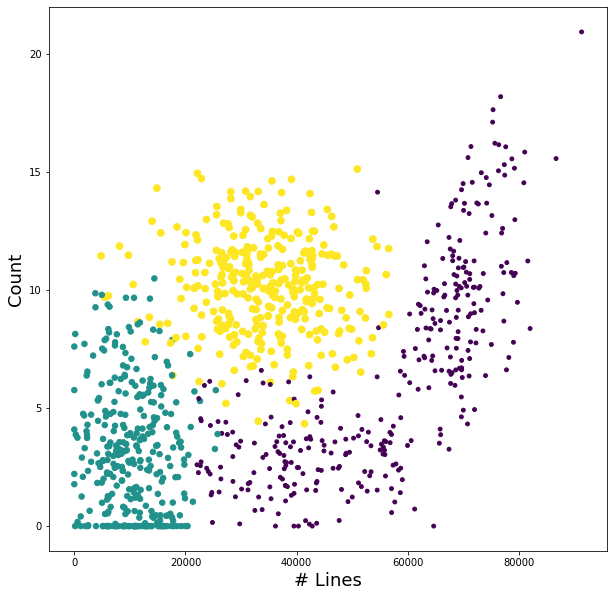

In [6]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(
    datingDataMat[:, 0],
    datingDataMat[:, 1],
    15.0 * array(datingLabels),
    15.0 * array(datingLabels),
)
ax.set_xlabel('# Lines', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
plt.show()